In [96]:
#import required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt #matplotlib for visualization
%matplotlib inline
import seaborn as sns #seaborn for visualization
sns.set_theme(color_codes = True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')



In [97]:
data = pd.read_csv("Bank Churn Data/Bank Customer Churn Prediction.csv") #load csv dataset as pandas dataframe



In [98]:
data.shape

(10000, 12)

In [99]:
#Data Analysis
data.info() #provide detailed information on each column of the dataset




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [100]:
data.head() #display first 5 lines of the dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
data.nunique() #display number of unique values for each column

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [102]:
data.dtypes #display the data type of each column


customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [103]:
#data preprocessing 
finaldata = data.drop('customer_id', axis = 1) #deletion of unecessary columns 
finaldata.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
finaldata.isnull().head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [107]:
finaldata.isnull().sum() #check the columns list for null (missing) values

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<AxesSubplot:xlabel='active_member', ylabel='count'>

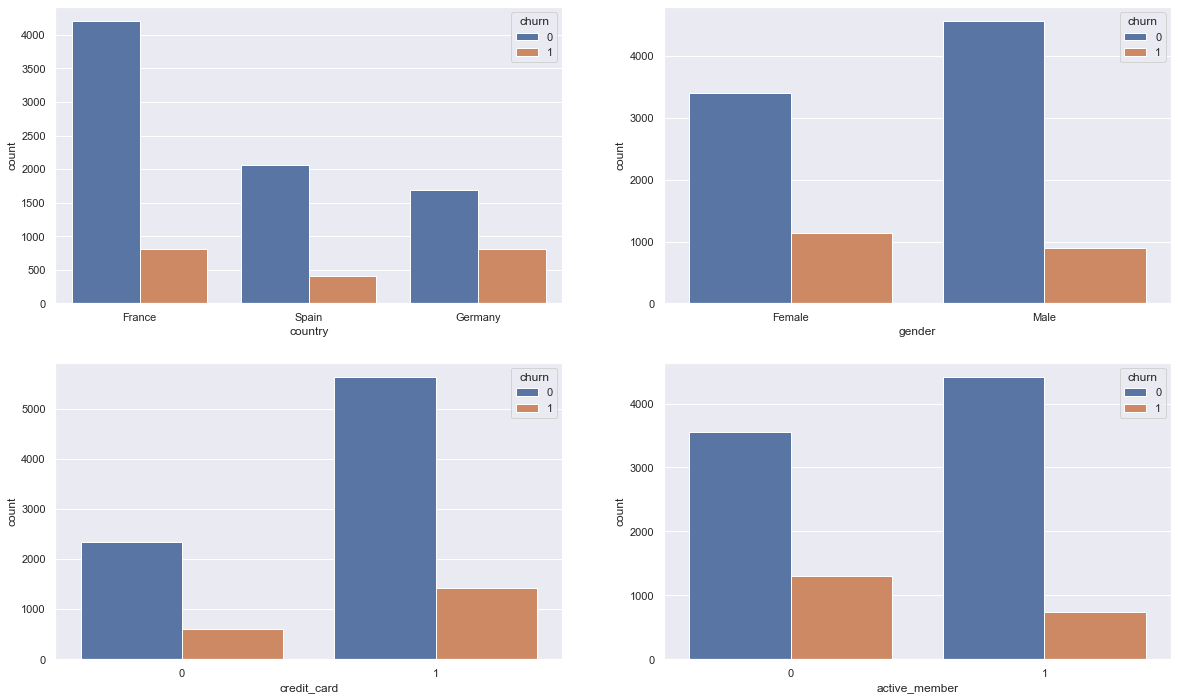

In [108]:
    #categorical variable analysis
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='country', hue = 'churn',data = finaldata, ax=axarr[0][0])
    sns.countplot(x='gender', hue = 'churn',data = finaldata, ax=axarr[0][1])
    sns.countplot(x='credit_card', hue = 'churn',data = finaldata, ax=axarr[1][0])
    sns.countplot(x='active_member', hue = 'churn',data = finaldata, ax=axarr[1][1])


0    7963
1    2037
Name: churn, dtype: int64


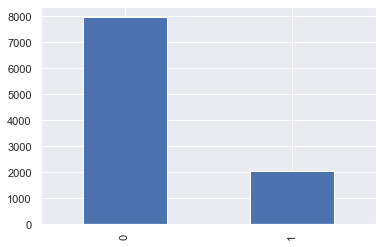

In [109]:
#Count the churned observations in the dataset and visualize the results in a bar graph
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = finaldata["churn"].map(lambda x: color_wheel.get(x + 1))
print(finaldata.churn.value_counts())
p=finaldata.churn.value_counts().plot(kind="bar")



In [110]:
#change the values in the'country' column
finaldata['country'] = finaldata['country'].replace(['Germany'],'0')
finaldata['country'] = finaldata['country'].replace(['France'],'1')
finaldata['country'] = finaldata['country'].replace(['Spain'],'2')
#change the values in the 'gender' column
finaldata['gender'] = finaldata['gender'].replace(['Female'],'0')
finaldata['gender'] = finaldata['gender'].replace(['Male'],'1')

In [111]:
#convert object data types to integer data types
finaldata['country'] = pd.to_numeric(finaldata['country'])
finaldata['gender'] = pd.to_numeric(finaldata['gender'])
finaldata.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

<AxesSubplot:>

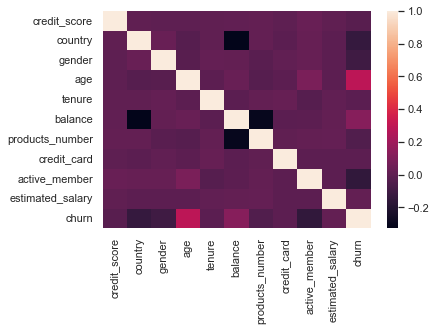

In [112]:
sns.heatmap(finaldata.corr(), fmt='.2g')

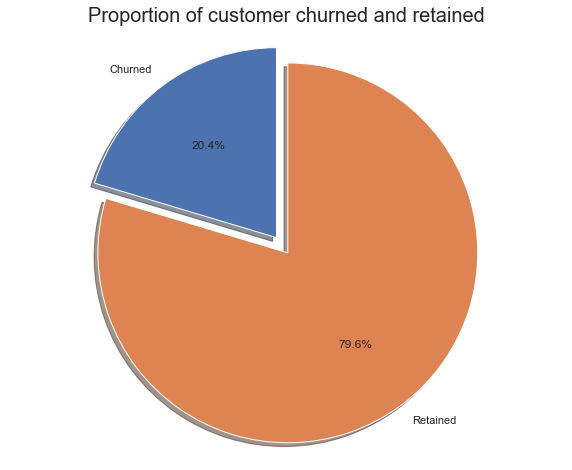

In [113]:
#pie chart visualization
labels = 'Churned', 'Retained'
sizes = [finaldata.churn[finaldata['churn']==1].count(), finaldata.churn[finaldata['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [114]:
#train and split data
X = finaldata.drop('churn', axis=1)
y = finaldata['churn']

#test size- 20%; train size- 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [115]:
# create the classifier 
clf = DecisionTreeClassifier(criterion='entropy')

#fit the classifier on the training data and make predictions on the test set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [116]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 78.95 %


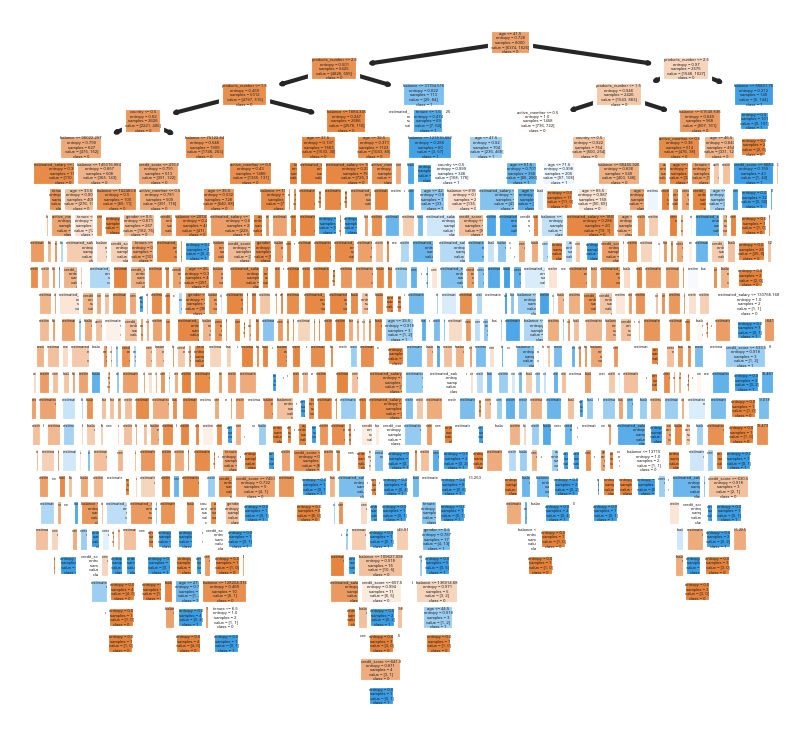

In [117]:
#plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = finaldata.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [120]:
#gridsearch
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}

In [121]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.3 %


In [123]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X, y)

for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

NameError: name 'feature_used' is not defined